<a href="https://colab.research.google.com/github/SalwaMustafa/DEPI-Task-1/blob/main/shopping_data_visualization_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analyze the shopping trend dataset by answering the questions below.
> **IMPORTANT** write your insights after each question

# Read the data

In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

/tmp/ipython-input-1162196871.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 407k/407k [00:00<00:00, 16.2MB/s]


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Question 1
What is the distribution of `Purchase Amount (USD)` for different `Subscription Status` values?
- Plot using both **Seaborn’s `boxplot` and Matplotlib’s histogram**.
- Are there any outliers?

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

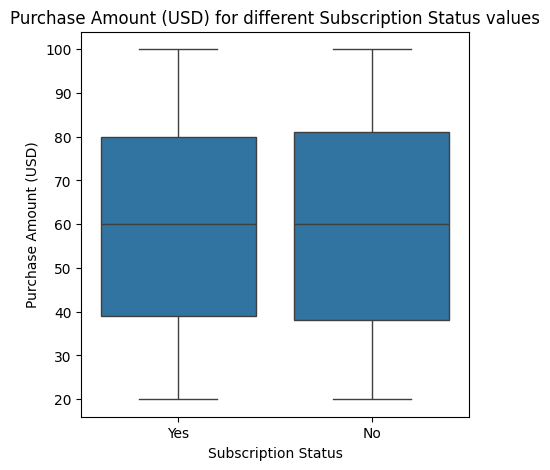

In [ ]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Subscription Status', y='Purchase Amount (USD)', data=df)
plt.title('Purchase Amount (USD) for different Subscription Status values')
plt.xlabel('Subscription Status')
plt.ylabel('Purchase Amount (USD)')
plt.show()

**There are no outliers.**

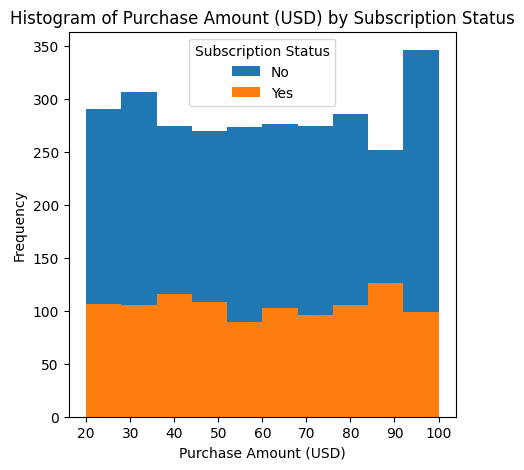

In [ ]:
grouped = df.groupby('Subscription Status')
plt.figure(figsize=(5, 5))

for name, group in grouped:
    plt.hist(group['Purchase Amount (USD)'],label=name)

plt.title('Histogram of Purchase Amount (USD) by Subscription Status')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.legend(title='Subscription Status')
plt.show()

### Question 2
Compare the frequency of each `Payment Method` across the dataset **from highest to lowest** .
- Use both **Seaborn's `countplot`** and **Matplotlib's bar plot**.

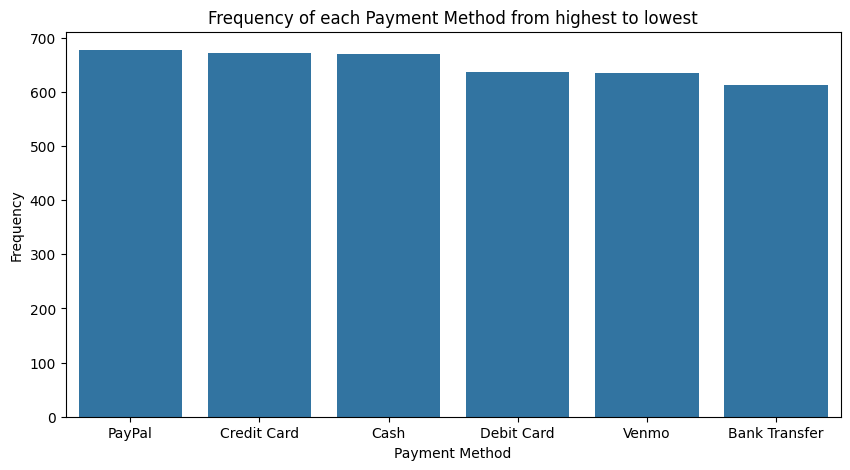

In [ ]:
payment_order = df['Payment Method'].value_counts().index

plt.figure(figsize=(10, 5))
sns.countplot(x='Payment Method', data=df , order = payment_order)
plt.title('Frequency of each Payment Method from highest to lowest')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.show()

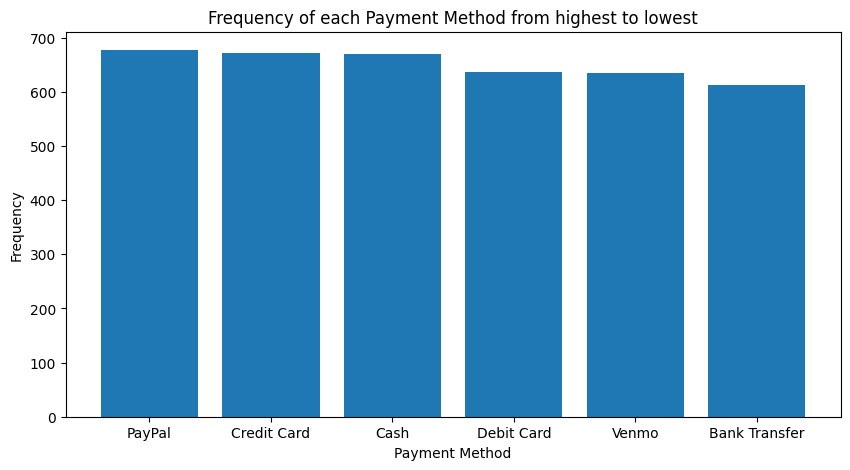

In [ ]:
payment_counts = df['Payment Method'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(payment_counts.index, payment_counts.values)
plt.title('Frequency of each Payment Method from highest to lowest')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.show()

### Question 3
Show the number of purchases made by each `Gender` in each `Season`.
- Create a **grouped bar chart/ Pie chart using Matplotlib**.
- Also plot a **stacked countplot using Seaborn**.

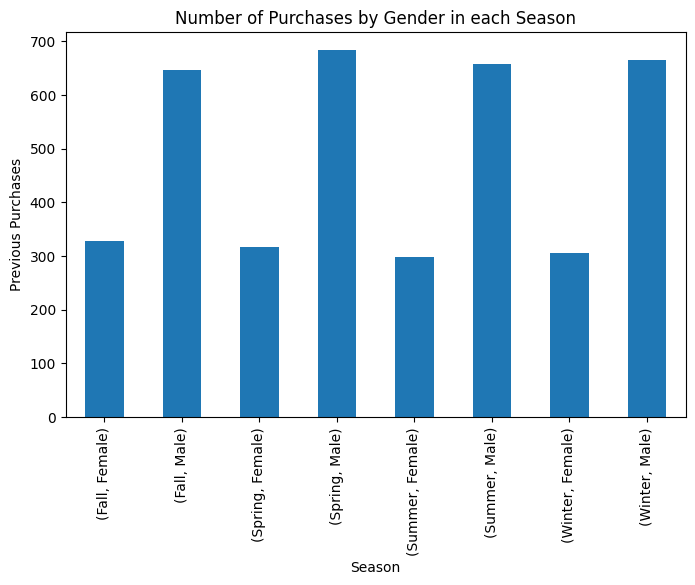

In [ ]:
grouped_counts = df.groupby(['Season', 'Gender'])['Previous Purchases'].count()

grouped_counts.plot(kind='bar', figsize=(8, 5))
plt.title('Number of Purchases by Gender in each Season')
plt.xlabel('Season')
plt.ylabel('Previous Purchases')
plt.show()

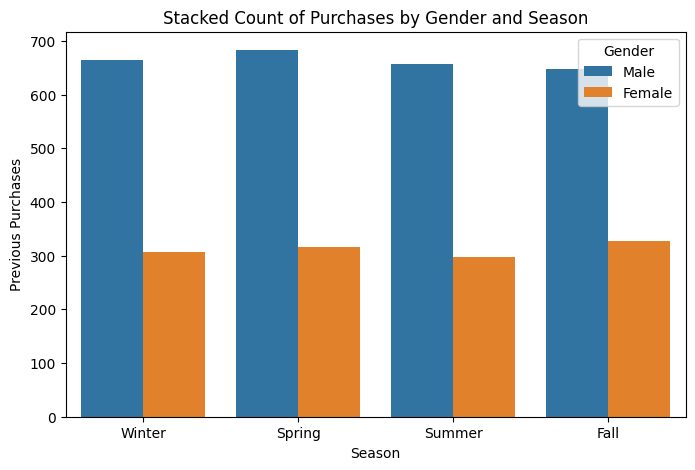

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Season', hue='Gender', data=df)
plt.title('Stacked Count of Purchases by Gender and Season')
plt.xlabel('Season')
plt.ylabel('Previous Purchases')
plt.legend(title='Gender')
plt.show()

### Question 4
Create a heatmap showing the correlation between all numeric columns.
- Use `sns.heatmap`.
- Interpret the relationship between `Previous Purchases`, `Purchase Amount`, and `Review Rating`.

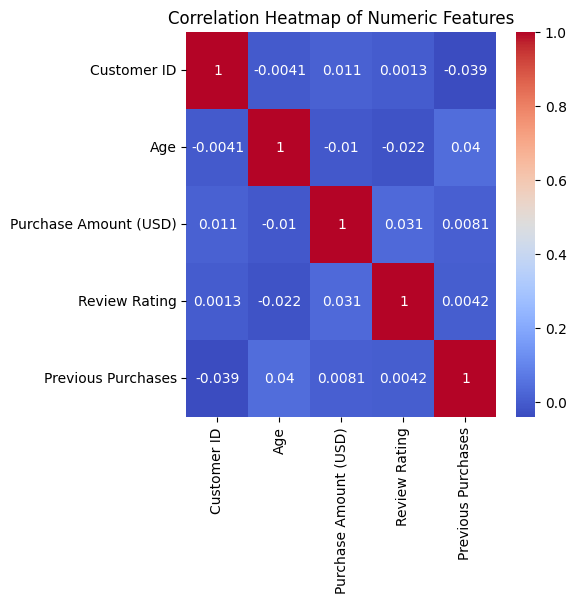

In [ ]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

Previous Purchases and Purchase Amount correlation is  0.0081

Meaning that There is almost no linear relationship between how many times a customer purchased before and how much they spend now.

**_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _**

Previous Purchases and Review Rating correlation is 0.0042

Meaning that almost no correlation. Frequent buyers do not tend to leave consistently higher or lower review ratings.

**_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _**


Purchase Amount and Review Rating correlation is 0.031

Meaning that a very slight positive relationship. Customers who spend more tend to give slightly better reviews but the correlation is so weak it's likely not significant.

### Question 5
Create a scatter plot of `Age` vs `Purchase Amount (USD)`, color-coded by `Gender`.
- Use **Matplotlib and Seaborn side-by-side**.
- Add a trend line in Seaborn using `regplot`.

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,2652
Female,1248


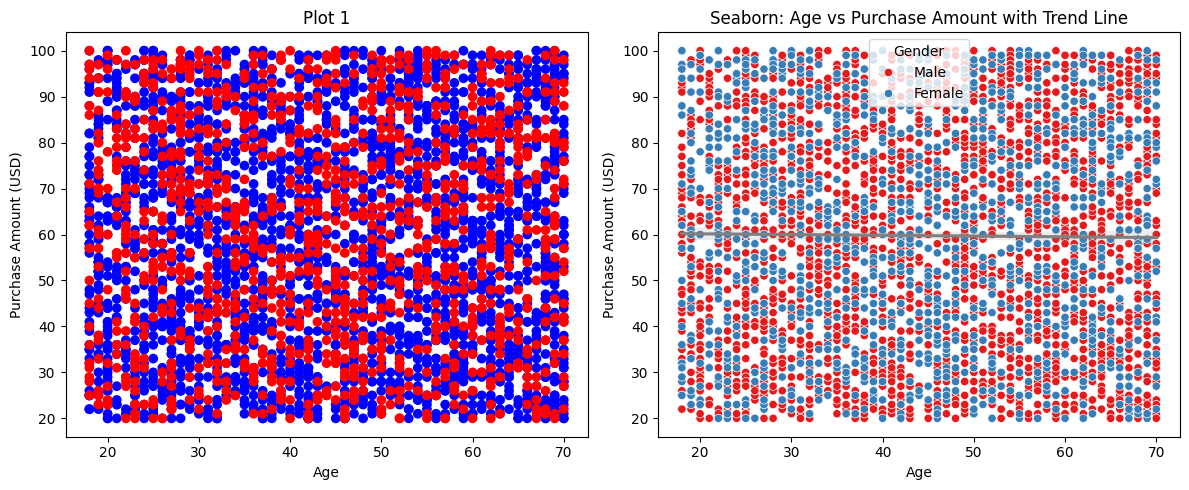

In [4]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
colors = ["blue"  if Gender =='Male' else "red" for Gender in df['Gender'] ]
plt.scatter(df['Age'], df['Purchase Amount (USD)'], c = colors)
plt.title("Plot 1")
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")


plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Age', y='Purchase Amount (USD)', hue='Gender', palette='Set1')
sns.regplot(data=df, x='Age', y='Purchase Amount (USD)', scatter=False, color='gray')

plt.title('plot 2')
plt.show()

### Question 6
How does the average review rating differ across different item `Categories` and `Sizes`?
- Use **Seaborn’s heatmap or pivot heatmap** to visualize.
- Use Pandas pivot table to prepare the data.

In [ ]:
import pandas as pd
pivot_table = pd.pivot_table(df, values='Review Rating', index='Category', columns='Size', aggfunc='mean')

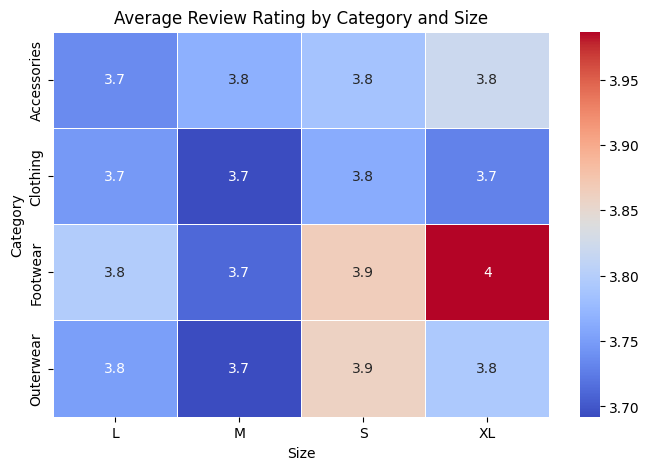

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Average Review Rating by Category and Size')
plt.show()

### Question 7
Which combinations of `Season` and `Shipping Type` lead to the highest average `Purchase Amount (USD)`?
- Show this as a **grouped bar chart** and as a **heatmap**.

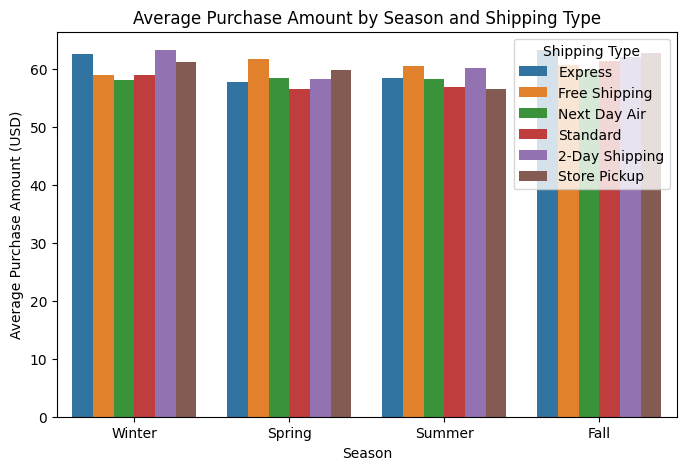

In [5]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Season', y='Purchase Amount (USD)', hue='Shipping Type',errorbar=None)
plt.title('Average Purchase Amount by Season and Shipping Type')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

In [ ]:
pivot_table = pd.pivot_table(df, values='Purchase Amount (USD)', index='Season', columns='Shipping Type', aggfunc='mean')

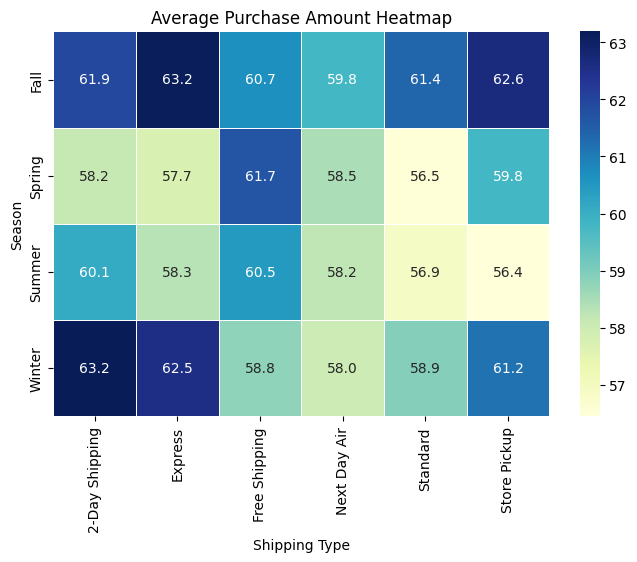

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=0.5)
plt.title('Average Purchase Amount Heatmap')
plt.show()

### Question 8
Plot a violin plot of `Review Rating` by `Gender` for each `Subscription Status`.
- Use `sns.violinplot` with `hue`.

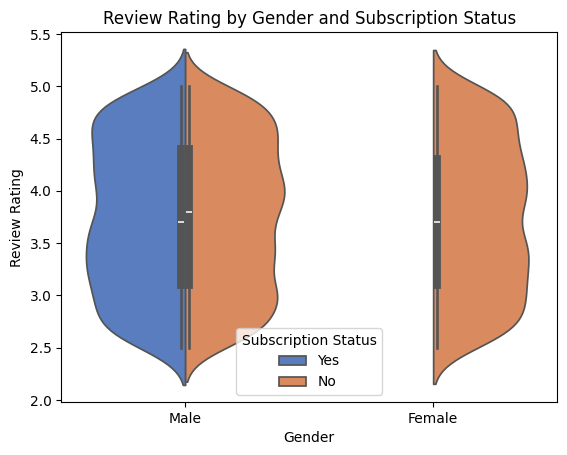

In [ ]:
sns.violinplot(data=df, x='Gender', y='Review Rating', hue='Subscription Status', split=True, palette='muted')
plt.title('Review Rating by Gender and Subscription Status')
plt.show()

### Question 9
What are the top 5 most purchased `Item Purchased` by total `Purchase Amount`?
- Use Pandas aggregation, plot with **Matplotlib pie and bar** charts.

In [ ]:
top_items = (df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(5))

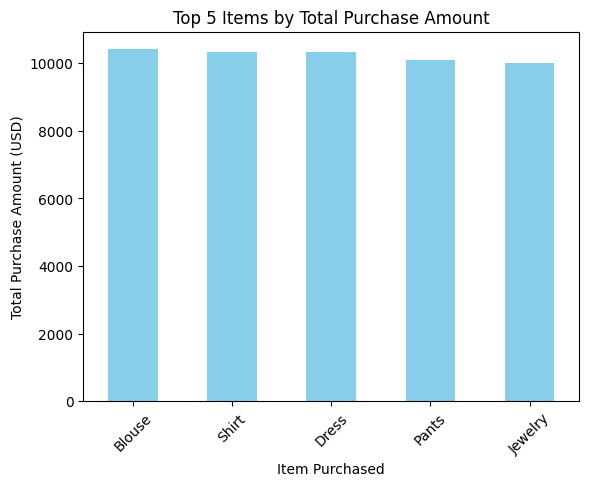

In [ ]:
top_items.plot(kind='bar', color='skyblue')
plt.title('Top 5 Items by Total Purchase Amount')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

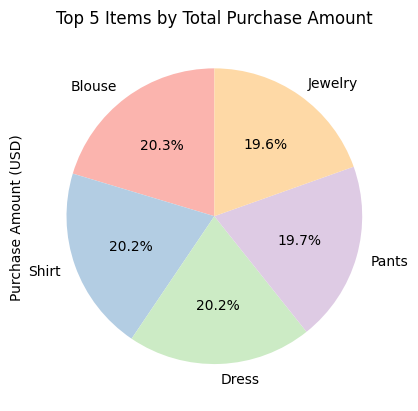

In [ ]:
top_items.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title('Top 5 Items by Total Purchase Amount')
plt.show()

### Question 10
Which `Location` has the highest average `Purchase Amount`, and how does it relate to `Previous Purchases` (plot only top 5 purchase amount location)?
- Use a **Seaborn scatterplot** with size/marker variation.

In [ ]:
avg_data = (df.groupby('Location').agg({'Purchase Amount (USD)': 'mean','Previous Purchases': 'mean'}).sort_values(by='Purchase Amount (USD)', ascending=False).head(5).reset_index())

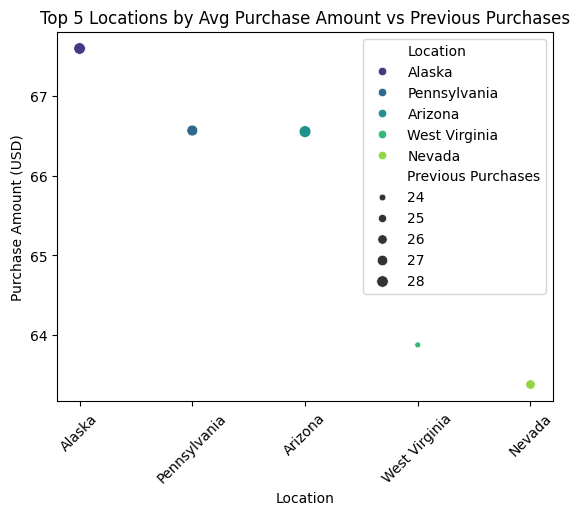

In [ ]:
sns.scatterplot(data=avg_data, x='Location', y='Purchase Amount (USD)', size='Previous Purchases', hue='Location', markers=True, palette='viridis', legend='brief')
plt.title('Top 5 Locations by Avg Purchase Amount vs Previous Purchases')
plt.xticks(rotation=45)
plt.show()

### Question 11
Using a crosstab, find how `Gender` and `Size` interact.
- Plot using `sns.heatmap`.

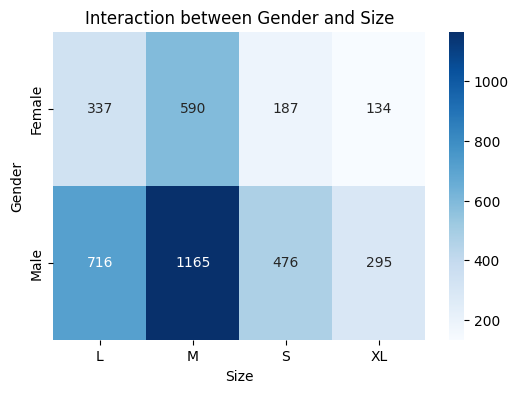

In [ ]:
gender_size_interact = pd.crosstab(df['Gender'], df['Size'])
plt.figure(figsize=(6,4))
sns.heatmap(gender_size_interact, annot=True, fmt='d', cmap='Blues')
plt.title('Interaction between Gender and Size')
plt.ylabel('Gender')
plt.xlabel('Size')
plt.show()

### Question 12
How does the frequency of purchases column influence the use of promo codes?
- Create a **stacked bar chart** using Matplotlib and compare with a **Seaborn countplot**.

In [ ]:
df.groupby(['Frequency of Purchases','Promo Code Used']) ['Promo Code Used'].count()

Frequency of Purchases  Promo Code Used
Annually                No                 334
                        Yes                238
Bi-Weekly               No                 321
                        Yes                226
Every 3 Months          No                 326
                        Yes                258
Fortnightly             No                 299
                        Yes                243
Monthly                 No                 316
                        Yes                237
Quarterly               No                 322
                        Yes                241
Weekly                  No                 305
                        Yes                234
Name: Promo Code Used, dtype: int64

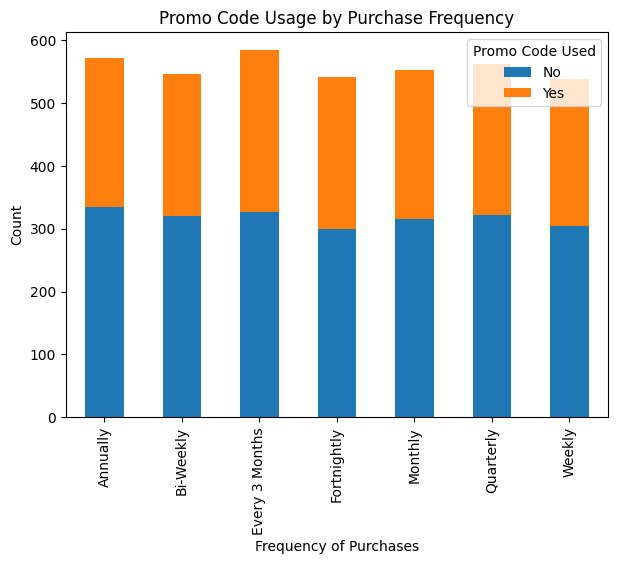

In [ ]:
promo_counts = df.groupby(['Frequency of Purchases','Promo Code Used']) ['Promo Code Used'].count().unstack(fill_value=0)

promo_counts.plot(kind='bar', stacked=True, figsize=(7,5))
plt.title('Promo Code Usage by Purchase Frequency')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.legend(title='Promo Code Used')
plt.show()

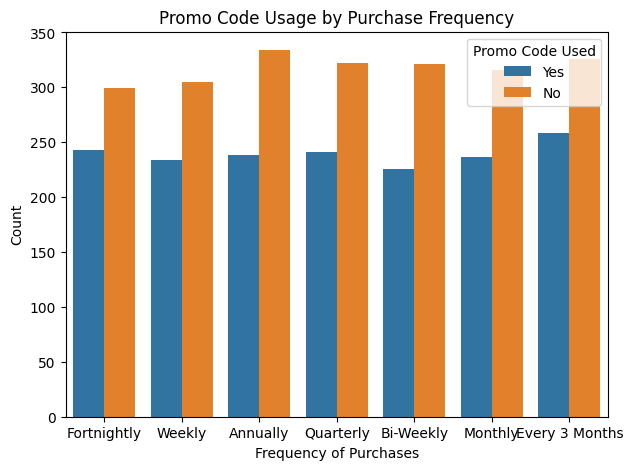

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Frequency of Purchases', hue='Promo Code Used')
plt.title('Promo Code Usage by Purchase Frequency')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.show()

### Question 13
Using a pairplot, show pairwise relationships between numeric columns segmented by `Gender`.
- Use `sns.pairplot` with `hue="Gender"`.

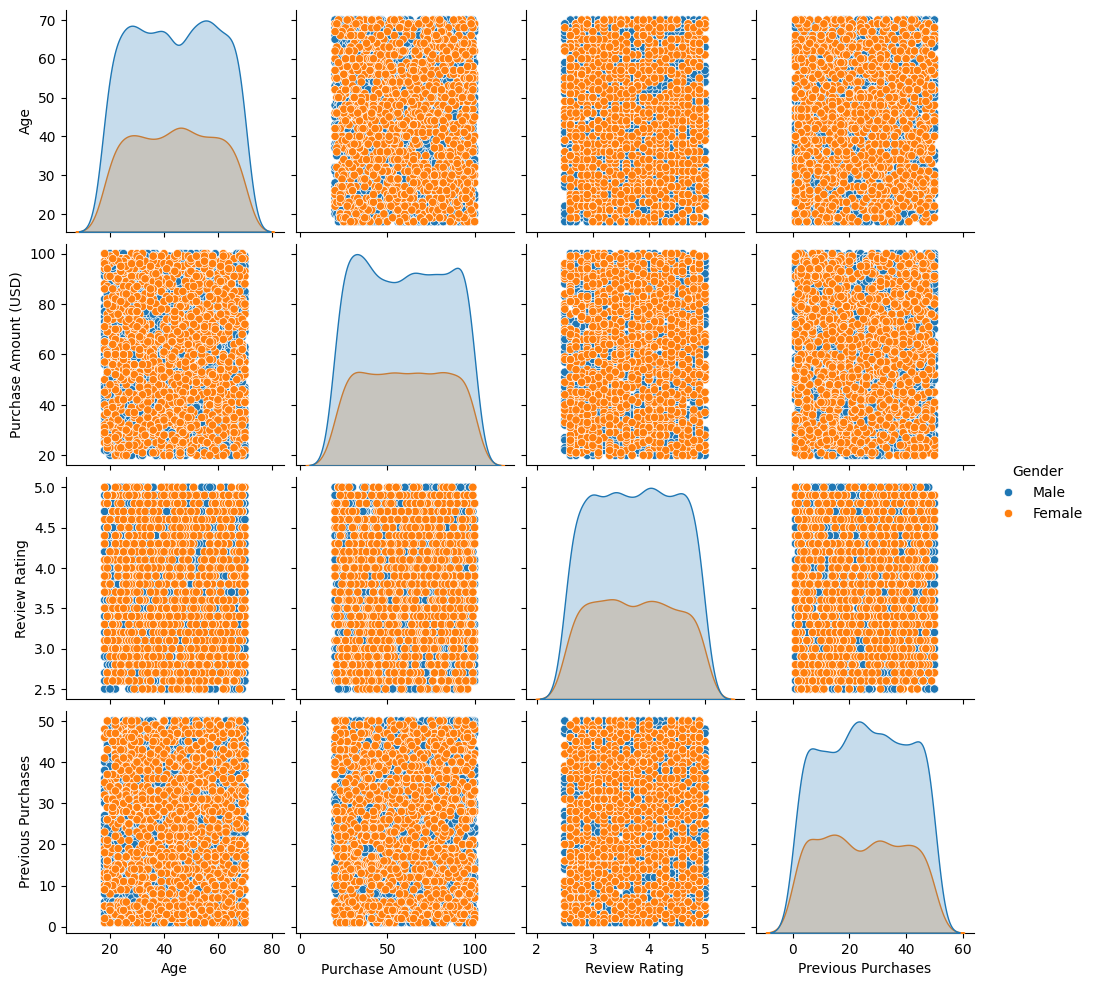

In [ ]:
sns.pairplot(data = df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases','Gender']], hue="Gender")
plt.show()